In [33]:
%load_ext google.cloud.bigquery
%matplotlib inline
from google.cloud import bigquery
client = bigquery.Client()
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import cluster
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import random
from sklearn.cluster import KMeans
import matplotlib.cm as cm

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


In [96]:
sql = '''
SELECT *  FROM `eth-tokens.alldata.toy` LIMIT 5000
'''

df = client.query(sql).to_dataframe()
df.head()

,address,outgoing_txns,incoming_txns,total_eth_sent,avg_eth_sent,total_usd_sent,avg_usd_sent,total_eth_recd,avg_eth_recd,total_usd_recd,avg_usd_recd,active_months,monthly_outgoing_txns,monthly_incoming_txns,monthly_eth_sent,monthly_usd_sent,monthly_eth_recd,monthly_usd_recd,contracts_created,contract_txns_sent
0,0xad391f88dfd96ce4c73accf2556ebbddb74e85f1,0,2,0,0,0.0,0.0,0.199299999,0.09965,39.606889,19.803444,1,0.0,2.0,0,0.0,0.199299999,39.606889,0,0
1,0x0751267744307eec7d34a0e6896cf59336cbc8fc,0,2,0,0,0.0,0.0,200.003,100.0015,41940.629100,20970.314550,1,0.0,2.0,0,0.0,200.003,41940.629100,0,0
2,0x97f602f85bfa67c4e4bc02965c55703bb6323b1d,0,2,0,0,0.0,0.0,0.022259136,0.011129568,4.474532,2.237266,1,0.0,2.0,0,0.0,0.022259136,4.474532,0,0
3,0x61def97d552b046ccd1f2d2cdef848524d7a8399,0,2,0,0,0.0,0.0,0.00084,0.00042,0.177912,0.088956,1,0.0,2.0,0,0.0,0.00084,0.177912,0,0
4,0x896a69e834e72cf33f07a83137835a303a0e2d97,0,2,0,0,0.0,0.0,4.93814,2.46907,1046.391866,523.195933,1,0.0,2.0,0,0.0,4.93814,1046.391866,0,0


In [97]:
data = df.iloc[:,1:]


In [4]:
cl = cluster.KMeans(4)

fit_cl = cl.fit(data)

centroids = fit_cl.cluster_centers_

In [5]:
pd.DataFrame(centroids, columns=data.columns)

,outgoing_txns,incoming_txns,total_eth_sent,avg_eth_sent,total_usd_sent,avg_usd_sent,total_eth_recd,avg_eth_recd,total_usd_recd,avg_usd_recd,active_months,monthly_outgoing_txns,monthly_incoming_txns,monthly_eth_sent,monthly_usd_sent,monthly_eth_recd,monthly_usd_recd,contracts_created,contract_txns_sent
0,4.576531,9.017347,16.605753,6.096568,4.362263e+03,1279.183199,20.260689,7.122202,5.421242e+03,1543.611542,12.369388,0.843418,1.505198,3.721000,905.500940,5.258048,1269.006645,0.005102,0.172449
1,39.000000,81.000000,13111.767273,336.199161,4.485804e+06,115020.603355,13111.803744,161.874120,4.477259e+06,55274.797131,18.000000,2.166667,4.500000,728.431515,249211.307268,728.433541,248736.587088,0.000000,0.000000
2,15.600000,29.266667,961.036016,266.139333,3.567146e+05,86050.627669,1066.036620,434.237538,4.145517e+05,132541.731462,13.466667,1.661273,2.870833,90.301936,32297.015298,96.999840,36085.947368,0.000000,0.000000
3,31.000000,84.750000,1585.207731,36.402691,5.736532e+05,15511.880117,2714.712020,36.769162,1.384328e+06,21390.850098,12.250000,3.228125,8.250000,218.083760,68991.367019,305.109861,130213.055800,0.000000,0.000000


In [6]:
pipe = Pipeline([('scale', StandardScaler()), ('PCA', PCA(n_components=5))])

In [7]:
pipe.fit(data)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('PCA', PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

In [8]:
results = pipe.fit_transform(data)

In [9]:
pca = pipe.named_steps['PCA']

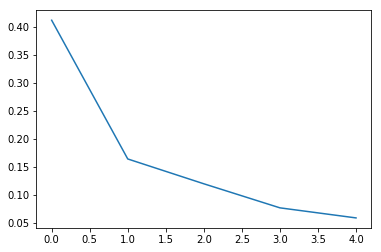

In [10]:
plt.plot(np.arange(pca.n_components_), pca.explained_variance_ratio_)

In [11]:
results.shape

(1000, 5)

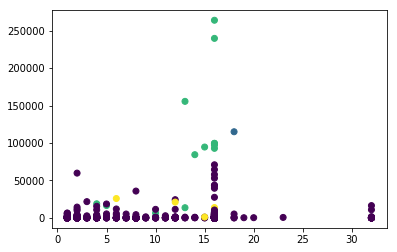

In [12]:
plt.scatter(data.active_months, data.avg_usd_sent, c=cl.labels_)

In [13]:
cl = cluster.KMeans().fit(results)

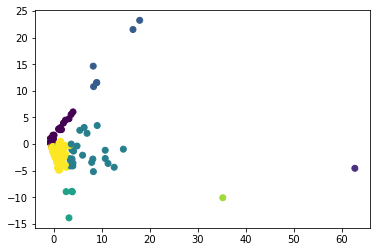

In [14]:
plt.scatter(results[:,0],results[:,1],c=cl.labels_)
# plt.ylim(-50,50)
# plt.xlim(-50,150)

In [15]:
silhouette_score(results, cl.labels_ )

0.6389653568573185

In [16]:
pipe = Pipeline([('scale', StandardScaler()), ('PCA', PCA(n_components=5))])

results = pipe.fit_transform(data.values)

/Users/will/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


For n_clusters = 6 The average silhouette_score is : 0.6986060169667051


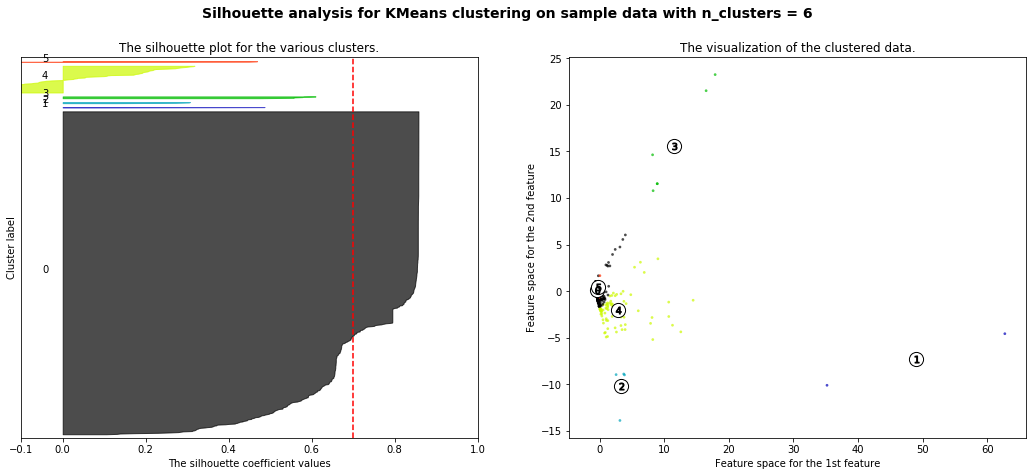

In [94]:

X=results





range_n_clusters = [6]

for n_clusters in range_n_clusters:
#     X=data
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    #subset data so I don't kill computer
#     X=data[:100]
#     cluster_labels[:100]
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [19]:
%run kmedians.py

In [98]:
k = 6

#length of data
datapoints = len(results)
indices = [random.randint(0,datapoints-1) for i in range(k+1)]
initial_centers = results[indices]

km =  kmedians(results, initial_centers, ccore=False)



In [99]:
km.process()
clusters = km.get_clusters()

In [100]:
clusters = np.array([np.array(x) for x in clusters])

(-1, 1)

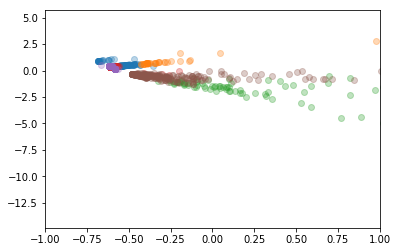

In [103]:
for i in range(k):
    plt.scatter(results[clusters[i]][:,0], results[clusters[i]][:,1], alpha=.3)
    
plt.xlim(-1,1)